In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as sts

carregamento do dataframe e contagem de linhas e colunas

In [23]:
df_tempo = pd.read_csv("../data/tempo.csv", sep=';', encoding='utf-8')
print(f'linhas: {df_tempo.shape[0]}\ncolunas: {df_tempo.shape[1]}')
df_tempo.head()

linhas: 14
colunas: 5


,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


contagem de NaN

In [24]:
df_tempo.isna().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

Descrição dos dados:
* Tipos de dados qualitativos:
    - Aparencia
    - Vento
    - Jogar
* Tipos de dados quantitativos:
    - Temperatura
    - Umidade

In [25]:
df_tempo['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

a media e a mediana de temperatura possuem uma diferença notável, apresentando a possibilidade de outliers

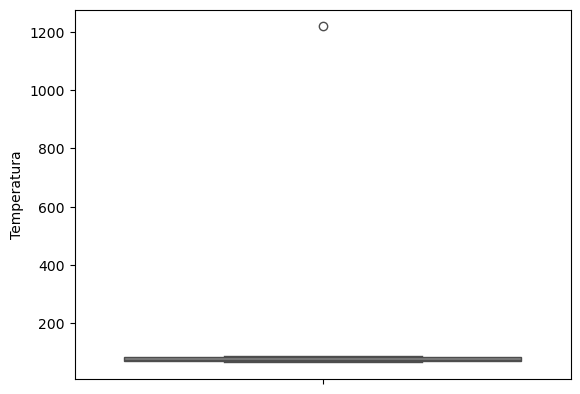

In [26]:
sns.boxplot(df_tempo['Temperatura'], color='gray')
plt.title="Boxplot de Temperatura"

In [27]:
df_tempo.loc[(df_tempo['Temperatura']< -130) | (df_tempo['Temperatura'] > 130), "Temperatura"]

7    1220
Name: Temperatura, dtype: int64

In [28]:
df_tempo['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

In [29]:
df_tempo.loc[(df_tempo['Umidade'] < 0) | (df_tempo['Umidade'] > 100), 'Umidade']

9    200.0
Name: Umidade, dtype: float64

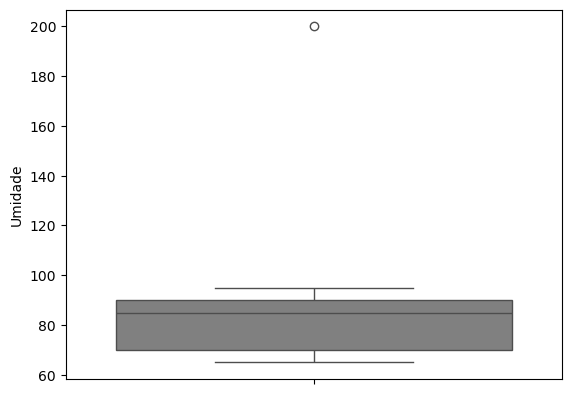

In [30]:
sns.boxplot(df_tempo['Umidade'], color='gray')
plt.title='Boxplot de Umidade.'

agrupamento por aparencia

In [31]:
agrupamento_aparencia = df_tempo.groupby(['Aparencia']).size()
agrupamento_aparencia

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

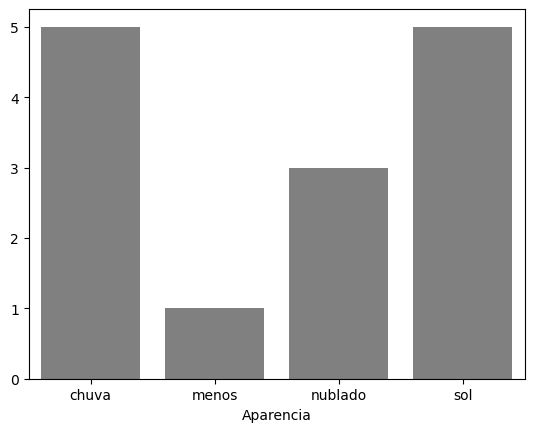

In [32]:
sns.barplot(data=agrupamento_aparencia, color='gray')
plt.title='Histplot de Aparencia'

agrupamento por vento

In [33]:
agrupamento_vento = df_tempo.groupby(['Vento']).size()
agrupamento_vento

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

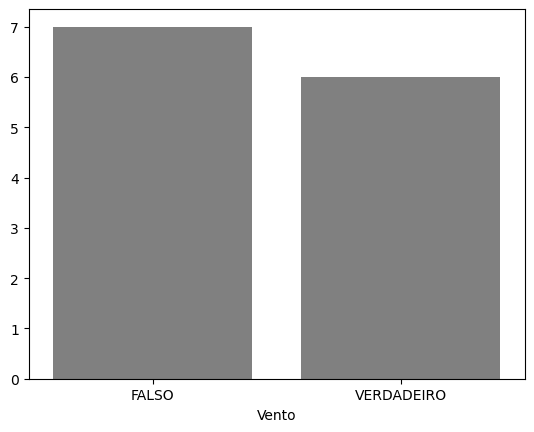

In [34]:
sns.barplot(data=agrupamento_vento, color='gray')
plt.title='Barplot por Vento'

agrupar por jogar

In [35]:
agrupamento_jogar = df_tempo.groupby(['Jogar']).size()
agrupamento_jogar

Jogar
nao    5
sim    9
dtype: int64

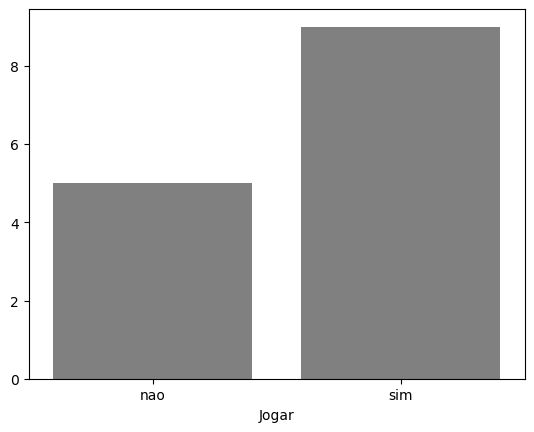

In [36]:
sns.barplot(data=agrupamento_jogar, color='gray')
plt.title='Barplot de agrupamento por Jogar'

### Tratamento

começando pela Umidade

In [37]:
#começando com o tratamento de umidade, substituindo o outlier pela mediana
mediana_umi = df_tempo['Umidade'].median()
mediana_umi

85.0

In [38]:
df_tempo.loc[(df_tempo['Umidade'] < 0) | (df_tempo['Umidade'] > 100), 'Umidade'] = mediana_umi

In [39]:
df_tempo.loc[(df_tempo['Umidade'] < 0) | (df_tempo['Umidade'] > 100), 'Umidade']

Series([], Name: Umidade, dtype: float64)

In [40]:
df_tempo.fillna({'Umidade': mediana_umi}, inplace=True);

In [41]:
df_tempo['Umidade'].isna().sum()

0

os valores NaN e outliers da coluna de Umidade foram substituidos pela mediana

tratamento de temperatura, a escala de temperatura utilizada é a fahrenheit, a temperatura deve estar entre os valores de -130 e 130

In [42]:
mediana_tmp = df_tempo['Temperatura'].median()
mediana_tmp

73.5

In [43]:
df_tempo.loc[(df_tempo['Temperatura'] < -130) | (df_tempo['Temperatura'] > 130), 'Temperatura'] = int(mediana_tmp)

In [44]:
df_tempo.loc[(df_tempo['Temperatura'] < -130) | (df_tempo['Temperatura'] > 130), 'Temperatura']

Series([], Name: Temperatura, dtype: int64)

In [45]:
df_tempo.fillna({'Temperatura': int(mediana_tmp)}, inplace=True)

In [46]:
df_tempo['Temperatura'].isna().sum()

0

os valores NaN e outliers da coluna de Temperatura foram substituidos pela mediana

tratamento da coluna aparencia

In [48]:
group_clima = df_tempo.groupby(['Aparencia']).size()
group_clima

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

In [49]:
df_tempo.loc[(df_tempo['Aparencia'] == 'menos'), 'Aparencia']

6    menos
Name: Aparencia, dtype: object

In [50]:
df_tempo.loc[(df_tempo['Aparencia'] == 'menos'), 'Aparencia'] = 'sol'

In [51]:
df_tempo.loc[(df_tempo['Aparencia'] == 'menos'), 'Aparencia']

Series([], Name: Aparencia, dtype: object)

In [52]:
group_clima = df_tempo.groupby(['Aparencia']).size()
group_clima

Aparencia
chuva      5
nublado    3
sol        6
dtype: int64

como chuva e sol possuiam a mesma quantidade, não importava sobre qual das duas opções iria ser alocado o novo dado.